In [3]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
!pip install wandb 
import wandb
wandb.login()

wandb: Currently logged in as: dharanivendhanv01. Use `wandb login --relogin` to force relogin


True

In [4]:
wandb.log

<function wandb.sdk.lib.preinit.PreInitCallable.<locals>.preinit_wrapper(self, data: Dict[str, Any], step: Optional[int] = None, commit: Optional[bool] = None, sync: Optional[bool] = None) -> None>

In [6]:
wandb.init(project = "Question_1")

In [7]:
(x1,y1),(x2,y2) = fashion_mnist.load_data()
x_train = x1.reshape(60000,784).T
y1_train = y1.reshape(60000,1).T
x_test  = x2.reshape(10000,784).T
y1_test  = y2.reshape(10000,1).T
print("without one-hot encoding")
print("shape of x_train :",x_train.shape)
print("shape of y_train :",y1_train.shape)
print("shape of x_test  :",x_test.shape)
print("shape of y_test  :",y1_test.shape)


without one-hot encoding
shape of x_train : (784, 60000)
shape of y_train : (1, 60000)
shape of x_test  : (784, 10000)
shape of y_test  : (1, 10000)


In [8]:
#one hot encoding

y_train = np.zeros((10,60000))
for i in range(0,60000):
    for j in range(0,10):
        if y1_train[0,i] == j:
            y_train[j,i] = 1
            
y_test = np.zeros((10,10000))
for i in range(0,10000):
    for j in range(0,10):
        if y1_test[0,i] == j:
            y_test[j,i] = 1
        

In [9]:
num_classes = y_train.shape[0]
class_name = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print("after one_hot encoding")
print("number of classes:",num_classes)
print("shape of x_train :",x_train.shape)
print("shape of y_train :",y_train.shape)
print("shape of x_test  :",x_test.shape)
print("shape of y_test  :",y_test.shape)

after one_hot encoding
number of classes: 10
shape of x_train : (784, 60000)
shape of y_train : (10, 60000)
shape of x_test  : (784, 10000)
shape of y_test  : (10, 10000)


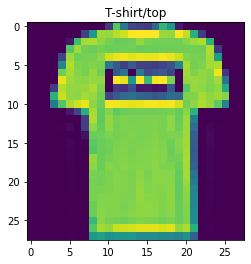

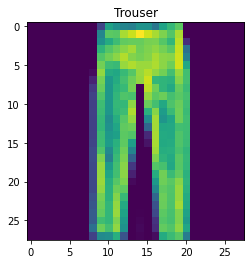

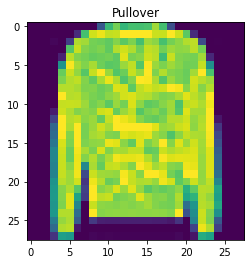

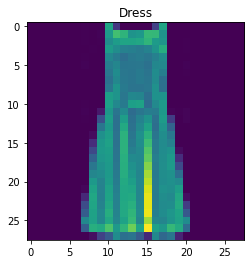

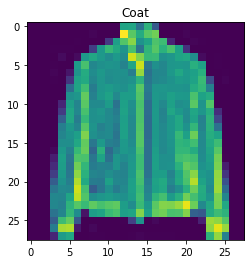

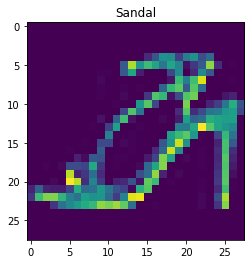

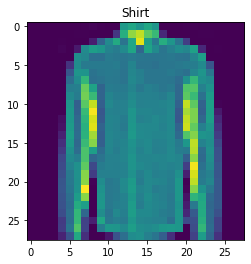

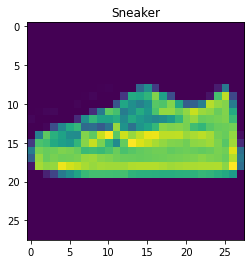

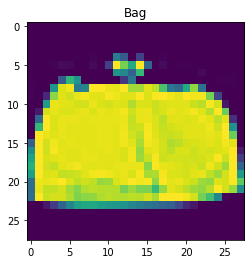

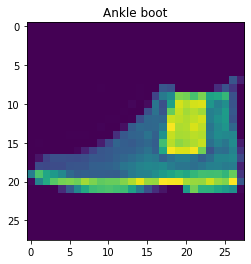

In [10]:
images_list = []
classes_list = []
i = 0

for j in range(y1_train.shape[1]):
        
        if y1_train[0,j] == i and i<=9:
            images = x_train[:,j].reshape(28,28)
            images_list.append(images)
            classes_list.append(class_name[y1_train[0,j]])
            i = i+1
        else:
            j = j+1
            
for i in range(num_classes):
    
    plt.imshow(images_list[i])
    plt.title(classes_list[i])
    plt.show()

In [11]:
wandb.log({"Qn 1":[wandb.Image(img,caption = caption) for img,caption in zip(images_list,classes_list)]})